## Crime to Income Ratio by Neighbourhood, Toronto

In [9]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('MCI_2014_to_2019.csv')

In [10]:
import geopandas as gpd
sns.set(style="darkgrid")
df_gp = data.groupby(['Hood_ID','Neighbourhood']).count()['Index_']
df_gp= df_gp.reset_index()

hoods = gpd.read_file("Neighbourhoods.shp")
merged = hoods.set_index('FIELD_7').join(df_gp.set_index('Neighbourhood'))
merged = merged.reset_index()

df_hood_income = pd.read_csv('hood_income.csv')
#convert to lower case for for mergin
df_hood_income['Neighborhood']=df_hood_income['Neighborhood'].str.lower()
df_hood_income.head()

#clrear hood numbers, because other table doesnt have numbers
merged['neighbourhood'] = merged['FIELD_8'].str.replace(' \(.+\)', '').str.lower()

merged_income = merged.set_index('neighbourhood').join(df_hood_income.set_index('Neighborhood'))
merged_income = merged_income.reset_index()

merged_income['Ratio'] = 100 * merged_income['Index_'] / merged_income['HoodAveIncome']

<AxesSubplot:title={'center':'Crime to Income ratio by Neighbourhood, Toronto'}>

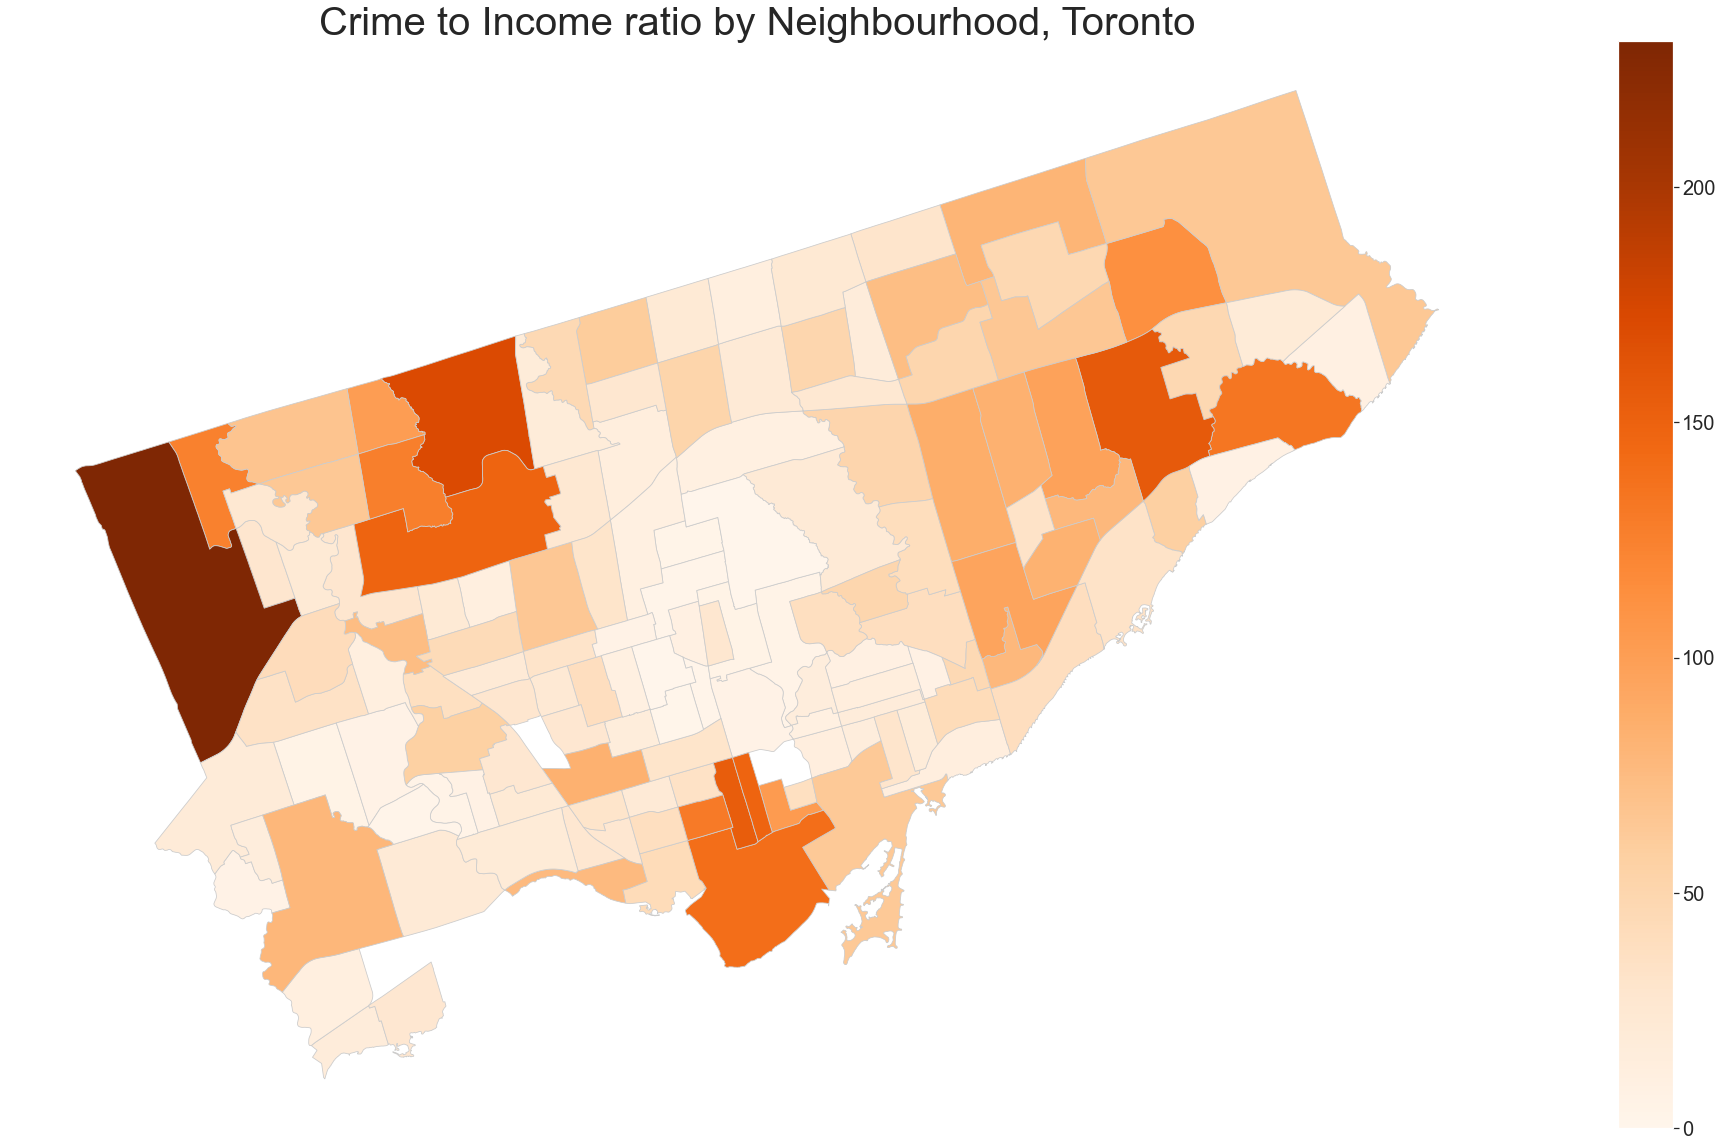

In [12]:
import matplotlib.pyplot as plt
#plot a map
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Crime to Income ratio by Neighbourhood, Toronto', fontdict={'fontsize': '40', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged_income.plot('Ratio', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

## Aggregating for Crime Counts by Neighbourhood and MCI Type

In [13]:
import pandas as pd
data = pd.read_csv('MCI_2014_to_2019.csv')

In [14]:
# Data for One-Way Anova, with Neighbourhood as the variable with  levels

one_way = data[data['occurrenceyear'] >= 2014]
one_way = one_way.groupby(['occurrenceyear', 'occurrencemonth', 'MCI', 'Neighbourhood'])['MCI'].agg(['count'])
one_way.reset_index(inplace=True)

In [15]:
import pandas as pd

# Preparing the data for Two-Way ANOVA
# Filter for crime in years 2014-2019 due to  

one_way = data[data['occurrenceyear'] >= 2014]
one_way = one_way.groupby(['occurrenceyear', 'occurrencemonth', 'MCI', 'Neighbourhood'])['MCI'].agg(['count'])
one_way.reset_index(inplace=True)


totals = one_way.groupby(['Neighbourhood','MCI'])['count'].agg(['sum'])
totals.reset_index(inplace=True)
overall_totals = totals.groupby(['Neighbourhood'])['sum'].agg(['sum'])
top_neighbourhoods = overall_totals.sort_values(by=['sum'], ascending=False).head(n=9)
top_neighbourhoods.reset_index(inplace=True)
neigh_list = top_neighbourhoods['Neighbourhood']

top_results = totals[totals['Neighbourhood'].isin(neigh_list)]

## Summarization Statistics for MCI's and Neighbourhoods

In [16]:
one_way.groupby(['Neighbourhood','MCI'])['count'].agg(['mean', 'std']).round(2)

mean   std
Neighbourhood           MCI                         
Agincourt North (129)   Assault           6.30  2.67
                        Auto Theft        2.87  1.73
                        Break and Enter   4.44  2.37
                        Robbery           2.78  2.51
                        Theft Over        1.40  0.60
...                                        ...   ...
Yorkdale-Glen Park (31) Assault          13.22  5.37
                        Auto Theft        4.96  2.36
                        Break and Enter   5.24  2.76
                        Robbery           2.91  1.70
                        Theft Over        2.14  1.29

[700 rows x 2 columns]

In [17]:
stats = one_way.groupby(['MCI'])['count'].agg(['mean', 'std']).round(2).reset_index()
stats.rename(columns={"mean":"Mean", "std":"Standard Deviation"})

MCI   Mean  Standard Deviation
0          Assault  11.24               11.62
1       Auto Theft   3.20                3.82
2  Break and Enter   4.74                4.17
3          Robbery   3.18                2.86
4       Theft Over   1.70                1.29

## Income for Neighbourhoods of Interest

In [18]:
avg_income = pd.read_csv('hood_income.csv')
sorted_inc = avg_income.sort_values(['HoodAveIncome'])
sorted_inc.reset_index(inplace=True)

In [19]:
sorted(sorted_inc['Neighborhood'].tolist())

['Agincourt North',
 'Agincourt South-Malvern West',
 'Alderwood',
 'Annex',
 'Banbury-Don Mills',
 'Bathurst Manor',
 'Bay Street Corridor',
 'Bayview Village',
 'Bayview Woods-Steeles',
 'Bedford Park-Nortown',
 'Beechborough-Greenbrook',
 'Bendale',
 'Birchcliffe-Cliffside',
 'Black Creek',
 'Blake-Jones',
 'Briar Hill-Belgravia',
 'Bridle Path-Sunnybrook-York Mills',
 'Broadview North',
 'Brookhaven-Amesbury',
 'Cabbagetown-South St. James Town',
 'Caledonia-Fairbank',
 'Casa Loma',
 'Centennial Scarborough',
 'Church-Yonge Corridor',
 'City of Toronto',
 'Clairlea-Birchmount',
 'Clanton Park',
 'Cliffcrest',
 'Corso Italia-Davenport',
 'Danforth',
 'Danforth East York',
 'Don Valley Village',
 'Dorset Park',
 'Dovercourt-Wallace Emerson-Junction',
 'Downsview-Roding-CFB',
 'Dufferin Grove',
 'East End-Danforth',
 'Edenbridge-Humber Valley',
 'Eglinton East',
 'Elms-Old Rexdale',
 'Englemount-Lawrence',
 'Eringate-Centennial-West Deane',
 'Etobicoke West Mall',
 'Flemingdon Park',


In [20]:
# West Humber Clairville is the 19th lowest income neighbourhood in GTA
sorted_inc[sorted_inc['Neighborhood'] == 'Waterfront Communities-The Island']

index                       Neighborhood  HoodAveIncome  HoodID
115    123  Waterfront Communities-The Island          70600      77

## Top 9 Most Dangerous Neighbourhoods from 2014-2019

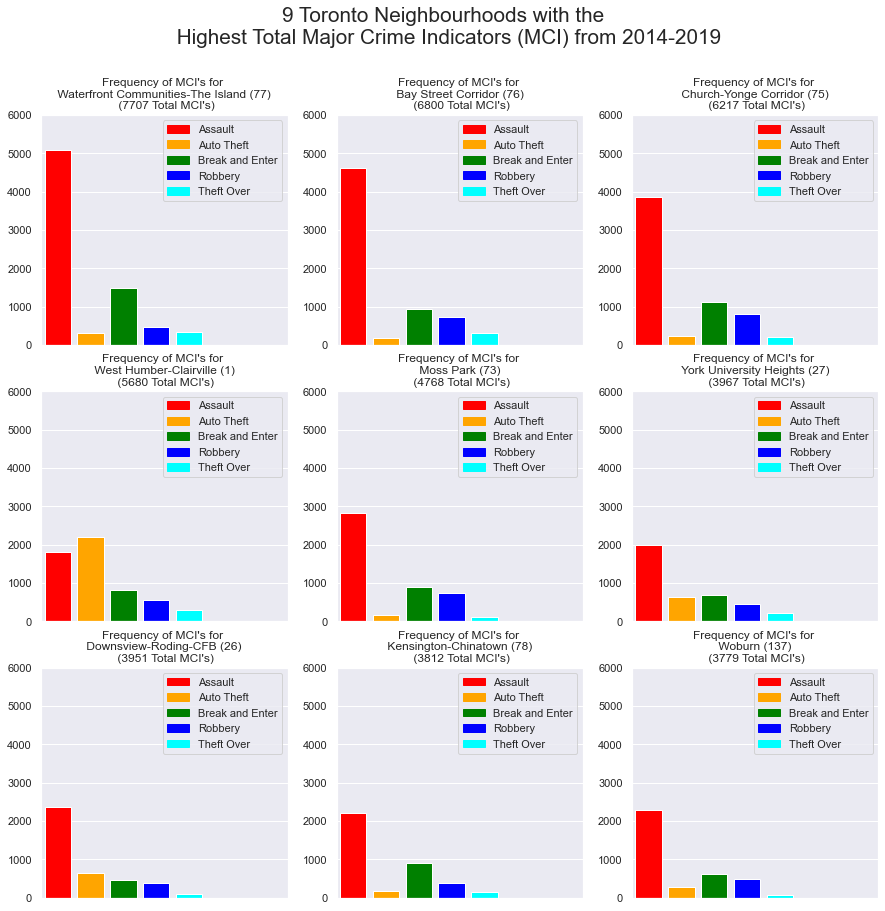

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np

sns.set()
fig, axs = plt.subplots(3,3, figsize=(15, 15))
curr_x = 0
curr_y = 0
colors = ['red', 'orange', 'green', 'blue', 'cyan']

for n in neigh_list.tolist():
    curr_n = top_results[top_results['Neighbourhood'] == n]
    curr_n.sort_values(by=['MCI'])
    freq = curr_n['sum']
    labels = curr_n['MCI'].tolist()
    total_freq = np.sum(freq)
    
    axs[curr_x, curr_y].bar(labels,freq, width=0.8, color=colors)
    axs[curr_x, curr_y].set_xlim(-0.5, 7)
    axs[curr_x, curr_y].set_ylim(0, 6000)
    axs[curr_x, curr_y].set_title("Frequency of MCI's for \n {} \n ({} Total MCI's)".format(n, total_freq))
    
    
    patches = []
    for i in range(len(labels)):
        patches.append(mpatches.Patch(color=colors[i], label=labels[i]))
    axs[curr_x, curr_y].legend(handles=patches)

    axs[curr_x,curr_y].set_xticks([])    
    
    if curr_y < 2:
        curr_y += 1
    else:
        curr_x += 1
        curr_y = 0

st = fig.suptitle("9 Toronto Neighbourhoods with the \n Highest Total Major Crime Indicators (MCI) from 2014-2019", fontsize="xx-large")
st.set_y(0.95)
fig.subplots_adjust(top=0.85)
fig.savefig('Top_9_MCI_Toronto.png')

### Effect Size (Eta Squared) and Statistical Power for One-Way ANOVA's

               MCI  Effective Sizes  Sample Sizes  Estimated_Power
0          Assault             0.76           648              1.0
1  Break and Enter             0.58           648              1.0
2          Robbery             0.56           643              1.0
3       Theft Over             0.57           565              1.0
4       Auto Theft             0.82           608              1.0


(0.0, 1.0, 0.0, 1.0)

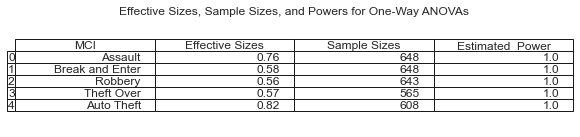

In [23]:
import numpy as np
import statsmodels.api as smapi
from statsmodels.stats.power import FTestAnovaPower
# Calculating effect size for one-way anova's using omega squared
# Calculated as SS_between / SS_total, where SS_total = SS_between + SS_within

def sum_of_squares(X):
    mean = np.mean(X)
    return np.sum([(i - mean)**2 for i in X])

def ss_within(one_way_df, neigh_list):
    ss = 0
    for n in neigh_list:
        X = one_way_df[one_way_df['Neighbourhood'] == n]['count']
        ss += sum_of_squares(X)
    return ss
def ss_between(one_way_df):
    return sum_of_squares(one_way_df['count'])

# Loop through all the crime and make a table of omega_squareds for ES
effective_sizes = []
sample_sizes = []
powers = []
mci = pd.unique(data['MCI'])

for m in mci:
    m_df = one_way[(one_way['Neighbourhood'].isin(neigh_list)) & 
            (one_way['MCI'] ==m)]
    omega_squared = np.round(ss_between(m_df) / (ss_between(m_df) + ss_within(m_df, neigh_list)), 2)
    sample_size = m_df.shape[0]
    analysis = FTestAnovaPower()
    power = np.round(analysis.solve_power(effect_size=omega_squared,
                                 nobs=sample_size, 
                                 alpha=0.05,
                                 k_groups=9), 2)
    
    effective_sizes.append(omega_squared)
    sample_sizes.append(sample_size)
    powers.append(power)
    
effective_sizes = pd.DataFrame({"MCI":mci, 
                                "Effective Sizes":effective_sizes,
                               "Sample Sizes":sample_sizes,
                               "Estimated_Power":power})
print(effective_sizes)

fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(111)
ax.table(cellText = effective_sizes.values,
        rowLabels = effective_sizes.index,
        colLabels = effective_sizes.columns,
        loc="center")
ax.set_title("Effective Sizes, Sample Sizes, and Powers for One-Way ANOVAs")
ax.axis("off")

### Assault Sample Size and Power Calculations

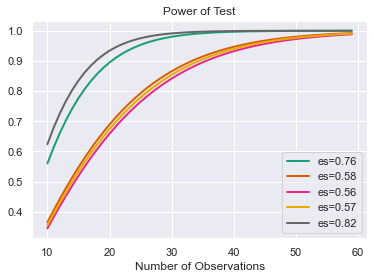

In [24]:
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import FTestAnovaPower
effect_sizes = effective_sizes['Effective Sizes']
sample_sizes = array(range(10, 60))
analysis = FTestAnovaPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

## One-Way ANOVA's for each Crime Type, using Neighbourhood as an Independent Variable

In [25]:
# We will iteratively conduct one-way ANOVA's for each crime type amongst our 9 top crime neighbourhoods
# We will conduct post-hoc tests after each one-way ANOVA to examine any significant differences in means
# between the neighbourhoods for each MCI type
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as smapi
import statsmodels as sm
from statsmodels.stats.anova import AnovaRM
from scipy import stats

mci = pd.unique(data['MCI'])
result_dict = {}

# Iterate through each MCI 
for m in mci:
    
    ow = one_way[(one_way['Neighbourhood'].isin(neigh_list)) & (one_way['MCI']==m)]

    linear_model = smf.ols(formula='count ~ Neighbourhood', data=one_way)
    fitted_model = linear_model.fit()
    anova_table = smapi.stats.anova_lm(fitted_model, typ=2)
    results={}
    results['ANOVA_p_value'] = anova_table['PR(>F)']['Neighbourhood']
    
    t_tests = {}
    
    # Pairwise iteration through all the different neighbourhood comparisons, for each crime type
    for i in range(len(neigh_list)):
        if i == (len(neigh_list) - 1):
            break
        
        for j in range(i+1, len(neigh_list)):
            t1 = one_way.loc[(one_way['MCI'] == m) & (one_way['Neighbourhood'] == neigh_list[i]), 'count'].to_numpy()
            t2 = one_way.loc[(one_way['MCI'] == m) & (one_way['Neighbourhood'] == neigh_list[j]), 'count'].to_numpy()

            t1_mu, t2_mu = np.mean(t1), np.mean(t2)
            t1_std, t2_std = np.std(t1), np.std(t2)
            t1_n, t2_n = len(t1), len(t2)

            p_value = stats.ttest_ind_from_stats(mean1=t1_mu, std1=t1_std, nobs1=t1_n, mean2=t2_mu, std2=t2_std, nobs2=t2_n,
                                      equal_var=False).pvalue
            
            t_tests[neigh_list[i] +  " vs." +  neigh_list[j]] = p_value
        
    uncorrected_p_values = list(t_tests.values())
    res = sm.stats.multitest.multipletests(uncorrected_p_values, method='bonferroni')
    bonf_correct_p_values = res[1]
    accept_reject = res[0]
    paired_results = list(zip(bonf_correct_p_values, accept_reject))
    corrected_t_tests = {p[0]:p[1] for p in list(zip(t_tests.keys(), paired_results))}
    
    results['Post_Hoc'] = corrected_t_tests
    result_dict[m] = results
    

In [26]:
# To find the p_value of the One-Way ANOVA for a particular crime type, use the dictionary object and enter crime type as key
# The ANOVA_p_value field is the corresponding p-value for this ANOVA test
# Post-Hoc Tests are accessed in the "Post Hoc" field, were each of the mean counts of the  neighbourhoods
# are tested against one another using a t-test, and adjusted using the Bonferroni Correction
# Here is an example:
result_dict['Assault']

{'ANOVA_p_value': 0.0,
 'Post_Hoc': {'Waterfront Communities-The Island (77) vs.Bay Street Corridor (76)': (0.19812461710088353,
   False),
  'Waterfront Communities-The Island (77) vs.Church-Yonge Corridor (75)': (8.826275189573303e-09,
   True),
  'Waterfront Communities-The Island (77) vs.West Humber-Clairville (1)': (2.754140307343096e-45,
   True),
  'Waterfront Communities-The Island (77) vs.Moss Park (73)': (6.788518343641289e-29,
   True),
  'Waterfront Communities-The Island (77) vs.York University Heights (27)': (8.715307697603835e-43,
   True),
  'Waterfront Communities-The Island (77) vs.Downsview-Roding-CFB (26)': (7.294157132512756e-38,
   True),
  'Waterfront Communities-The Island (77) vs.Kensington-Chinatown (78)': (1.327916895568624e-40,
   True),
  'Waterfront Communities-The Island (77) vs.Woburn (137)': (8.255445042313916e-39,
   True),
  'Bay Street Corridor (76) vs.Church-Yonge Corridor (75)': (0.001804414501232967,
   True),
  'Bay Street Corridor (76) vs.West H

In [27]:
# Selected Results
s_mcis = ["Assault", "Assault", "Assault","Assault ","Auto Theft", "Auto Theft", "Auto Theft", 
          "Break and Enter", "Break and Enter", "Break and Enter", "Robbery", "Robbery", "Theft Over",
         "Theft Over", "Theft Over"]
s_pair = ["Waterfront Communities-The Island (77) vs. Bay Street Corridor (76)",
         "Waterfront Communities-The Island (77) vs. West Humber-Clairville (1)",
          'Bay Street Corridor (76) vs. \nWoburn (137)',
          'Kensington-Chinatown (78) vs. \nWoburn (137)',
         "Waterfront Communities-The Island (77) vs. West Humber-Clairville (1)",
         "York University Heights (27) vs. Downsview-Roding-CFB (26)",
        "Waterfront Communities-The Island (77) vs. Church-Yonge Corridor (75)",
          'Bay Street Corridor (76) vs. West Humber-Clairville (1)',
          'Church-Yonge Corridor (75) vs. Kensington-Chinatown (78)',
          'Waterfront Communities-The Island (77) vs. West Humber-Clairville (1)',
          'Waterfront Communities-The Island (77) vs. West Humber-Clairville (1)',
          'Waterfront Communities-The Island (77) vs. Moss Park (73)',
          'West Humber-Clairville (1) vs. Woburn (137)',
          'Waterfront Communities-The Island (77) vs. Downsview-Roding-CFB (26)',
          'Waterfront Communities-The Island (77) vs. West Humber-Clairville (1)'
          
          
          
         ]
s_reject = ["False", "True", "True", "False","True", "False", "False", 
            "False", "False", "True", "False", "True","True",
           "True", "False"]
s_results = pd.DataFrame({"MCI":s_mcis, "Pair":s_pair, "Reject (p < 0.05)":s_reject})

In [28]:
from IPython.display import display, HTML

def pretty_print(df):
    return display(HTML(df.to_html().replace("\\n","<br>")))
pretty_print(s_results)

## Two-Way ANOVA with Crime Type Counts as Outcome, Neighbourhood and Premise as Variables

In [29]:
# Data processing for Two-Way ANOVA with premise as the second variable

two_way_premise = data[(data['occurrenceyear'] >= 2014) & (data['Neighbourhood'].isin(neigh_list))]
two_way_premise = two_way_premise.groupby(['occurrenceyear', 'occurrencemonth', 'MCI', 'Neighbourhood', 'premisetype'])['MCI'].agg(['count'])
two_way_premise.reset_index(inplace=True)

In [30]:
mci = pd.unique(data['MCI'])
tw_result_dict = {}

for m in mci:
    tw = two_way_premise[(two_way_premise['Neighbourhood'].isin(neigh_list)) & (two_way_premise['MCI'] == m)]
    fitted_model = smf.ols(formula='count ~ premisetype*Neighbourhood', data=tw).fit()
    two_way_anova = (smapi.stats.anova_lm(fitted_model, typ=2))
    results = {}
    results['premisetype_pvalue'] = two_way_anova['PR(>F)']['premisetype']
    results['Neighbourhood_pvalue'] = two_way_anova['PR(>F)']['Neighbourhood']
    results['premisetype:Neighbourhood_pvalue'] = two_way_anova['PR(>F)']['premisetype:Neighbourhood']
    tw_result_dict[m] = results

/Users/justinlee/Desktop/Master/Thesis/venv/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)
/Users/justinlee/Desktop/Master/Thesis/venv/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 5
  'rank is %d' % (J, J_), ValueWarning)
/Users/justinlee/Desktop/Master/Thesis/venv/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 32, but rank is 27
  'rank is %d' % (J, J_), ValueWarning)
/Users/justinlee/Desktop/Master/Thesis/venv/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  'rank is %d' % (

In [31]:
# We see that the interaction effect is statistically significant for each of the 5 MCI's
for key in tw_result_dict.keys():
    print(key)
    print(tw_result_dict[key])
    print('\n')

Assault
{'premisetype_pvalue': 8.701526395147745e-177, 'Neighbourhood_pvalue': 0.0, 'premisetype:Neighbourhood_pvalue': 0.0}


Break and Enter
{'premisetype_pvalue': 2.964829686947206e-132, 'Neighbourhood_pvalue': 9.92021560062289e-40, 'premisetype:Neighbourhood_pvalue': 6.270111232103984e-55}


Robbery
{'premisetype_pvalue': 2.7321250579800526e-114, 'Neighbourhood_pvalue': 2.804730162132893e-25, 'premisetype:Neighbourhood_pvalue': 2.2178927681683483e-15}


Theft Over
{'premisetype_pvalue': 4.8862576405026334e-17, 'Neighbourhood_pvalue': 3.298864552616869e-18, 'premisetype:Neighbourhood_pvalue': 4.901208460850933e-14}


Auto Theft
{'premisetype_pvalue': 3.4807764121181525e-147, 'Neighbourhood_pvalue': 2.0270363554067995e-208, 'premisetype:Neighbourhood_pvalue': 1.827135272765837e-122}




In [32]:
tw_mcis = ['Assault', 'Break and Enter', 'Robbery', 'Theft Over', 'Auto Theft']
interactions= ['Significant', 'Significant', 'Significant', 'Significant', 'Significant']
pd.DataFrame({"MCI":tw_mcis, "Premise x Neighbourhood Interaction Significance @ alpha=5%":interactions})

MCI Premise x Neighbourhood Interaction Significance @ alpha=5%
0          Assault                                        Significant         
1  Break and Enter                                        Significant         
2          Robbery                                        Significant         
3       Theft Over                                        Significant         
4       Auto Theft                                        Significant

## Two-Way ANOVA Interaction Plots

Text(0.5, 1.0, 'Two-Way ANOVA Outcome: Assault Counts per Month from 2014-2019')

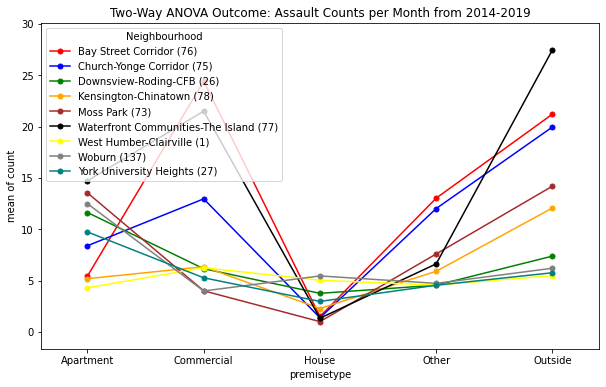

In [118]:
# Interaction Plot for Neighbourhood vs. Premise Type and Assault Crime Counts
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ctype = two_way_premise[two_way_premise['MCI'] == 'Assault']
ctype.reset_index(inplace=True)
colors = ['red','blue', 'green', 'orange', 'brown', 'black', 'yellow', 'gray', 'teal']
fig = interaction_plot(ctype['premisetype'], ctype['Neighbourhood'], ctype['count'], colors= colors, ms=10, ax=ax)
ax.set_title("Two-Way ANOVA Outcome: Assault Counts per Month from 2014-2019")

Text(0.5, 1.0, 'Two-Way ANOVA Outcome: Robbery Counts per Month from 2014-2019')

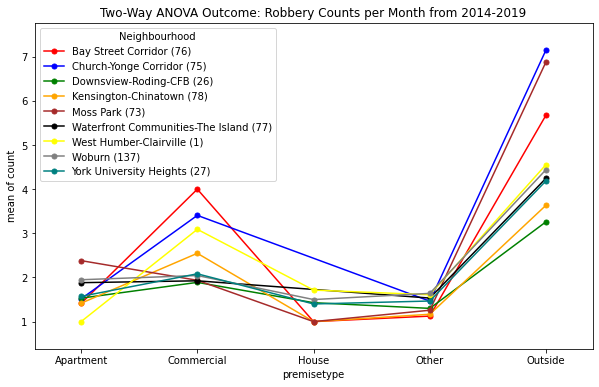

In [119]:
# Interaction Plot for Neighbourhood vs. Premise Type and Assault Crime Counts
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ctype = two_way_premise[two_way_premise['MCI'] == 'Robbery']
ctype.reset_index(inplace=True)

colors = ['red','blue', 'green', 'orange', 'brown', 'black', 'yellow', 'gray', 'teal']
fig = interaction_plot(ctype['premisetype'], ctype['Neighbourhood'], ctype['count'], colors= colors, ms=10, ax=ax)
ax.set_title("Two-Way ANOVA Outcome: Robbery Counts per Month from 2014-2019")

Text(0.5, 1.0, 'Two-Way ANOVA Outcome: Auto Theft Counts per Month from 2014-2019')

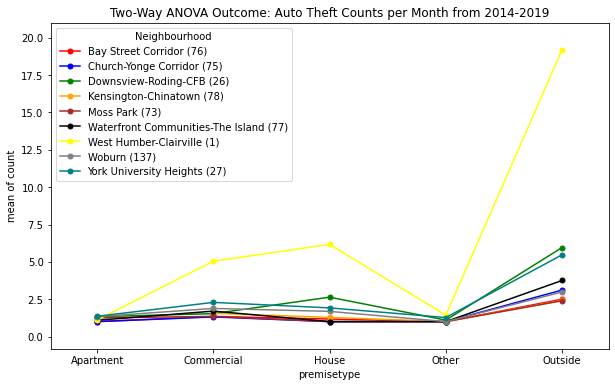

In [137]:
# Interaction Plot for Neighbourhood vs. Premise Type and Assault Crime Counts
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ctype = two_way_premise[two_way_premise['MCI'] == 'Auto Theft']
ctype.reset_index(inplace=True)

colors = ['red','blue', 'green', 'orange', 'brown', 'black', 'yellow', 'gray', 'teal']
fig = interaction_plot(ctype['premisetype'], ctype['Neighbourhood'], ctype['count'], colors= colors, ms=10, ax=ax)
ax.set_title("Two-Way ANOVA Outcome: Auto Theft Counts per Month from 2014-2019")

Text(0.5, 1.0, 'Two-Way ANOVA Outcome: Theft Over Counts per Month from 2014-2019')

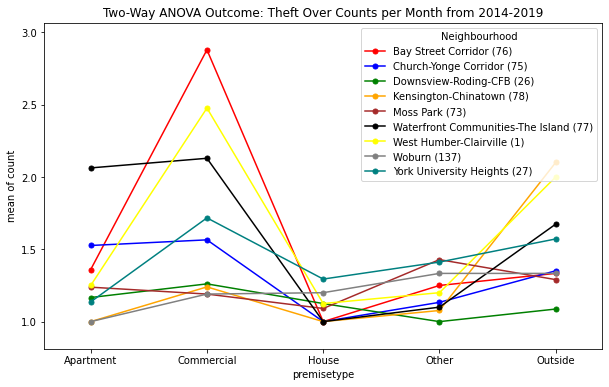

In [122]:
# Interaction Plot for Neighbourhood vs. Premise Type and Assault Crime Counts
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ctype = two_way_premise[two_way_premise['MCI'] == 'Theft Over']
ctype.reset_index(inplace=True)

colors = ['red','blue', 'green', 'orange', 'brown', 'black', 'yellow', 'gray', 'teal']
fig = interaction_plot(ctype['premisetype'], ctype['Neighbourhood'], ctype['count'], colors= colors, ms=10, ax=ax)
ax.set_title("Two-Way ANOVA Outcome: Theft Over Counts per Month from 2014-2019")

Text(0.5, 1.0, 'Two-Way ANOVA Outcome:  Break and Enter Counts per Month from 2014-2019')

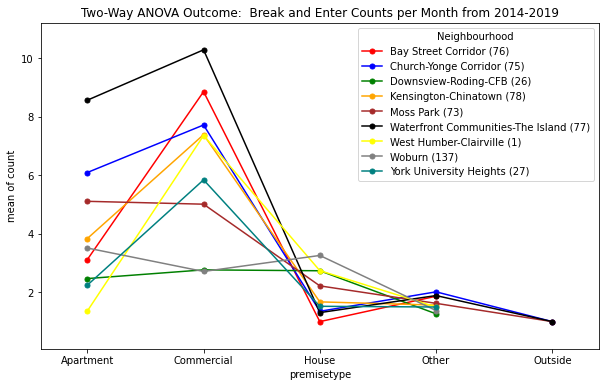

In [123]:
# Interaction Plot for Neighbourhood vs. Premise Type and Assault Crime Counts
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ctype = two_way_premise[two_way_premise['MCI'] == 'Break and Enter']
ctype.reset_index(inplace=True)

colors = ['red','blue', 'green', 'orange', 'brown', 'black', 'yellow', 'gray', 'teal']
fig = interaction_plot(ctype['premisetype'], ctype['Neighbourhood'], ctype['count'], colors= colors, ms=10, ax=ax)
ax.set_title("Two-Way ANOVA Outcome:  Break and Enter Counts per Month from 2014-2019")

## Two-Way ANOVA with Neighbourhood and Occurence Month as Variables

In [18]:
# Data processing for Two-Way ANOVA with month as the second variable

two_way_month = data[data['occurrenceyear'] >= 2014]
two_way_month = two_way_month.groupby(['occurrenceyear', 'occurrencemonth','MCI','Neighbourhood'])['MCI'].agg(['count'])
two_way_month.reset_index(inplace=True)

In [19]:
mci = pd.unique(data['MCI'])
tw_result_dict = {}

for m in mci:
    tw = two_way_month[(two_way_month['Neighbourhood'].isin(neigh_list)) & (two_way_month['MCI'] == m)]
    fitted_model = smf.ols(formula='count ~ occurrencemonth*Neighbourhood', data=tw).fit()
    two_way_anova = (smapi.stats.anova_lm(fitted_model, typ=2))
    results = {}
    results['occurrencemonth_pvalue'] = two_way_anova['PR(>F)']['occurrencemonth']
    results['Neighbourhood_pvalue'] = two_way_anova['PR(>F)']['Neighbourhood']
    results['occurrencemonth:Neighbourhood_pvalue'] = two_way_anova['PR(>F)']['occurrencemonth:Neighbourhood']
    tw_result_dict[m] = results

In [20]:
# We see that there is no statistical significant interaction effect between month and neighbourhood at the alpha=5% level
tw_result_dict

{'Assault': {'occurrencemonth_pvalue': 1.9109141025017996e-10,
  'Neighbourhood_pvalue': 3.929845332510993e-148,
  'occurrencemonth:Neighbourhood_pvalue': 0.9628948959415299},
 'Break and Enter': {'occurrencemonth_pvalue': 0.004502225808075991,
  'Neighbourhood_pvalue': 1.851825815892969e-40,
  'occurrencemonth:Neighbourhood_pvalue': 0.9993971750613263},
 'Robbery': {'occurrencemonth_pvalue': 0.0018575315685777929,
  'Neighbourhood_pvalue': 6.395437868383768e-32,
  'occurrencemonth:Neighbourhood_pvalue': 0.09492049030673935},
 'Theft Over': {'occurrencemonth_pvalue': 0.029254981570405476,
  'Neighbourhood_pvalue': 3.756814014899624e-31,
  'occurrencemonth:Neighbourhood_pvalue': 0.736196611524671},
 'Auto Theft': {'occurrencemonth_pvalue': 0.802833754763706,
  'Neighbourhood_pvalue': 2.7928505365298465e-169,
  'occurrencemonth:Neighbourhood_pvalue': 0.999670741745085}}